##**Permiability prediction with Machine Learning Techniques:**

- MLP-ANN
- Decision Tree
- Randomforest
- SVM
-KNN

###**Loading data:**

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel('/content/drive/My Drive/Colab Notebooks/well_data_new.xlsx')
df.head()

,DT-P,DT-S,Gamma,Neutron,Resistivity,PE,RHOB,Permia,Depth
0,86.437,158.062,124.315,0.218,1.432,2.836,2.579,0.5347,3250.0824
1,86.740,159.092,125.772,0.205,1.276,2.823,2.573,0.6312,3250.2348
2,87.021,158.781,127.832,0.223,1.137,2.881,2.566,0.7659,3250.3872
3,89.668,163.265,131.626,0.272,1.068,2.965,2.550,1.1919,3250.5396
4,91.163,165.690,134.925,0.306,1.110,3.094,2.543,1.4463,3250.6920


**Summary of the statistical values of the used data**

In [ ]:
stat=df.describe()
stat.loc['skewness']=df.skew(axis=0)
stat.loc['kurtosis']=df.kurtosis(axis=0)
stat.loc['variance']=df.var(axis=0)
stat.T[:-1]

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,variance
DT-P,374.0,80.238521,7.029800,68.885,74.70200,78.9930,86.15500,100.5520,0.598901,-0.369807,49.418086
DT-S,374.0,143.590626,16.873406,114.052,129.02950,142.2690,156.47475,196.1540,0.607140,-0.140471,284.711834
Gamma,374.0,103.238802,32.860640,32.826,74.57275,114.6475,128.86625,160.9290,-0.546848,-0.960967,1079.821645
Neutron,374.0,0.235316,0.076484,0.107,0.17125,0.2150,0.29800,0.4320,0.619725,-0.648764,0.005850
Resistivity,374.0,2.735749,2.002690,0.366,1.27900,1.9275,3.90050,9.5920,1.155120,0.545287,4.010766
PE,374.0,2.978610,1.100090,0.908,2.29375,3.1470,3.64100,8.1480,0.401827,2.173145,1.210198
RHOB,374.0,2.568987,0.088218,2.312,2.53450,2.5860,2.62800,2.7630,-0.700636,0.031996,0.007782
Permia,374.0,25.041448,87.642389,0.057,0.47880,1.6779,9.40415,857.0642,6.278787,45.440375,7681.188297


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**sorting feature and Target:**

In [ ]:
x=df.drop(['Depth','Permia'],axis=1) #contain 7 features
y=df['Permia']                        #target

#**MLP-ANN Method**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.utils import plot_model
from sklearn import preprocessing,metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler=MinMaxScaler()       ###scaling the data between 0 to 1
x_scaled=scaler.fit_transform(x)

**spliting the data in Train and Test**
- test size=20%
- train size=80%



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((299, 7), (299,), (75, 7), (75,))

**MLP-ANN Model:**

Input=7

1st hidden layer,node=25

2nd hiden layer ,node=5

output=1

In [ ]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(hidden_layer_sizes=(25,5,),activation='relu',max_iter=8000,solver='lbfgs',random_state=3)
nn.fit(x_train,y_train)
pred=nn.predict(x_train)
pred_1=nn.predict(x_test)

In [ ]:
for i in range(10):
  print('predict %.2f----->Expect %.2f'% (pred_1[i],np.array(y_test)[i]))

predict 0.45----->Expect 0.46
predict 5.86----->Expect 5.91
predict 4.78----->Expect 2.54
predict -0.42----->Expect 0.25
predict 0.85----->Expect 0.41
predict 13.51----->Expect 9.21
predict 28.86----->Expect 33.78
predict 5.63----->Expect 7.88
predict 5.03----->Expect 0.69
predict 0.29----->Expect 0.29


Text(0.5, -0.28, 'Normalized input log variables used in the study')

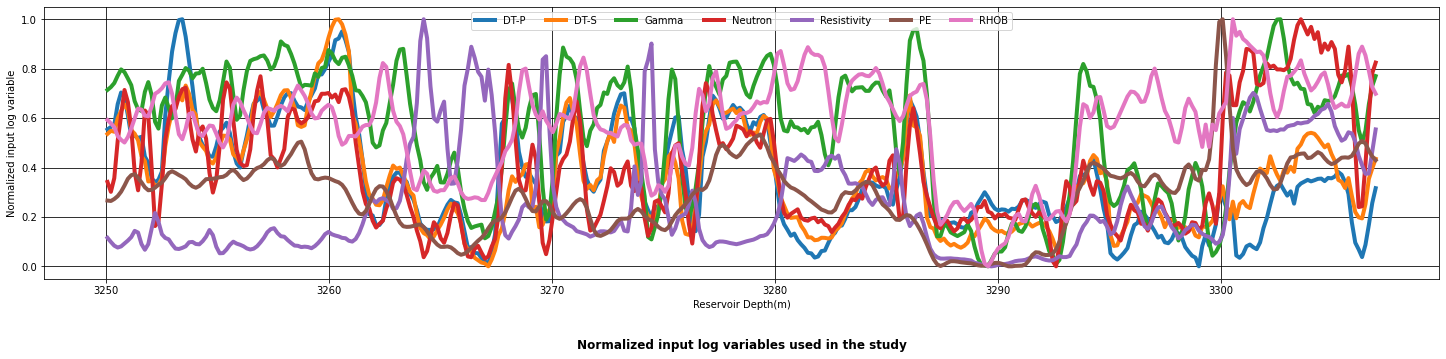

In [ ]:
plt.figure(figsize=(25,5))
plt.grid(True, color='k')
plt.plot(df['Depth'], x_scaled,linewidth=4)
plt.xlabel('Reservoir Depth(m)')
plt.ylabel('Normalized input log variable')
plt.legend(['DT-P','DT-S','Gamma','Neutron','Resistivity','PE','RHOB'],ncol=7)
plt.title('Normalized input log variables used in the study',y=-0.28,fontweight='bold')

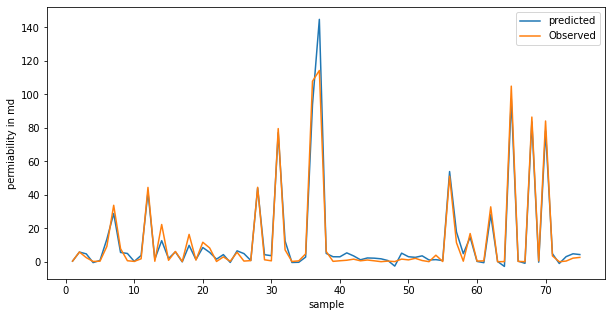

In [ ]:
plt.figure(figsize=(10,5))
z=np.array([range(1,76,1)])
plt.plot(z[0],pred_1)
plt.plot(z[0],y_test)
#plt.yscale('log')
plt.ylabel('permiability in md')
plt.xlabel('sample')
plt.legend(['predicted','Observed'])
plt.show()

Text(0.5, 0, 'permiability in md')

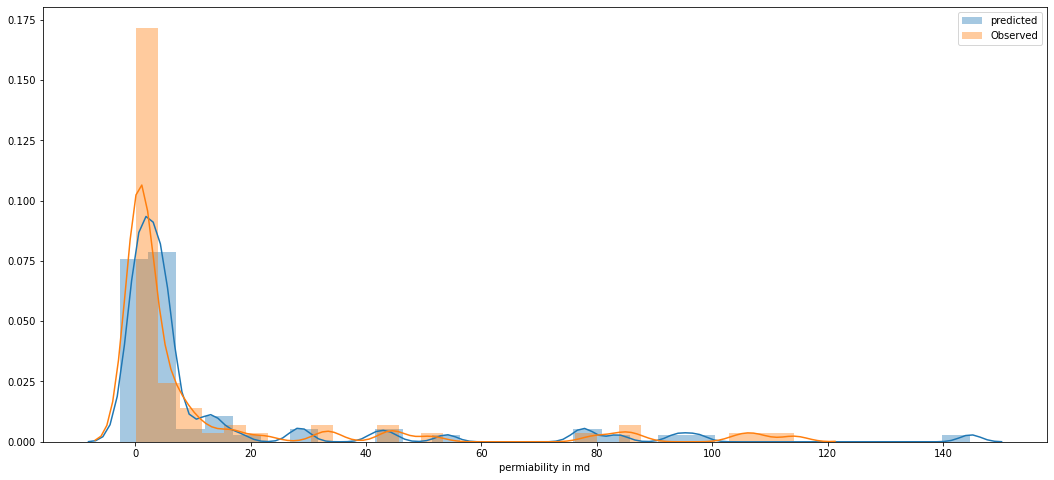

In [ ]:
plt.figure(figsize=(18,8))
sns.distplot(pred_1,bins=30)
sns.distplot(y_test,bins=30)              #if the distribution plot match for both observed and predicted data set ,then the model is good
plt.legend(['predicted','Observed'])
plt.xlabel('permiability in md')

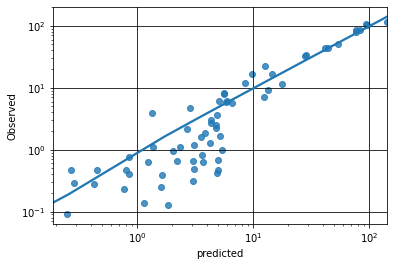

In [ ]:
sns.regplot(pred_1,y_test,'.',ci=None)
plt.grid(True,color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('predicted')
plt.ylabel('Observed')
plt.show()

##**Model evaluation**

- R2 score 
- RMSE value

In [ ]:
from sklearn import metrics
mse=np.sqrt(metrics.mean_squared_error(y_train,pred ))
r2=metrics.r2_score(y_train,pred)
print(mse,r2)

5.282837516472171 0.9970162276948727


In [ ]:
E_ANN=np.sqrt(metrics.mean_squared_error(y_test,pred_1 ))   #as the r2 and RMSE value are very close for both train and test set, the model is free from overfitting.
R_ANN=metrics.r2_score(y_test,pred_1)
print(R_ANN,E_ANN)

0.9677598094149708 4.847214061015751


#**Decision** **Tree method**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

Train and Test spliting 
- Test size=20%

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
regressor=DecisionTreeRegressor(random_state=42)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
y_test.shape,y_pred.shape

((75,), (75,))

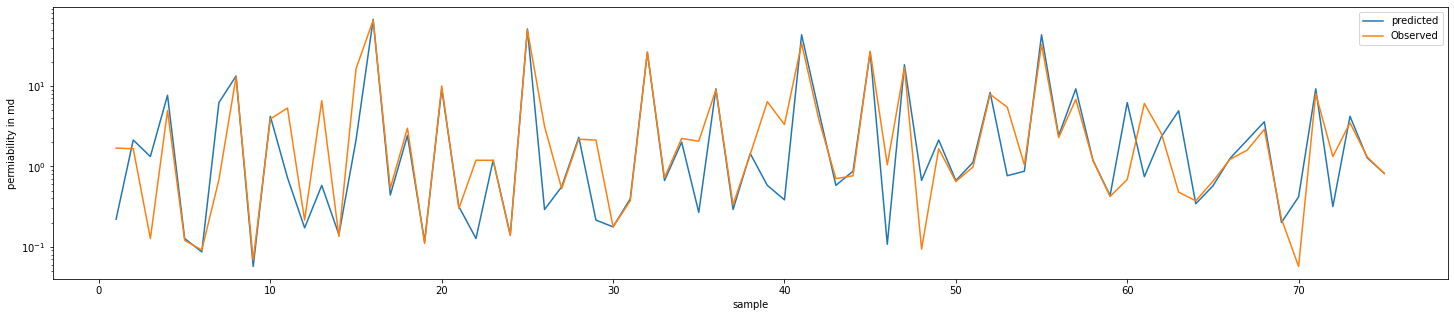

In [ ]:
plt.figure(figsize=(25,5))
z=np.array([range(1,76,1)])
plt.plot(z[0],y_pred)
plt.plot(z[0],y_test)
plt.yscale('log')
plt.ylabel('permiability in md')
plt.xlabel('sample')
plt.legend(['predicted','Observed'])

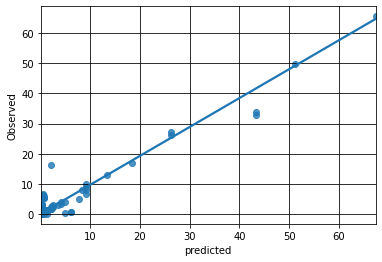

In [ ]:
sns.regplot(y_pred,y_test,'.',ci=None,robust=True,)
plt.grid(True,color='black')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('predicted')
plt.ylabel('Observed')
plt.show()

**Model evaluation**
- R2 score
- RMSE 

In [ ]:
E_DST=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
np.sqrt(metrics.mean_squared_error(y_pred,y_test))

3.0202046095587627

In [ ]:
y_test.std()

11.296734126188621

In [ ]:
R_DST=metrics.r2_score(y_test,y_pred)
metrics.r2_score(y_test,y_pred)

0.9275569943749494

#**RANDOM FOREST METHOD**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
regressor_2=RandomForestRegressor(random_state=42)
regressor_2.fit(x_train,y_train)
y_pred_2=regressor_2.predict(x_test)
y_test.shape,y_pred_2.shape

((75,), (75,))

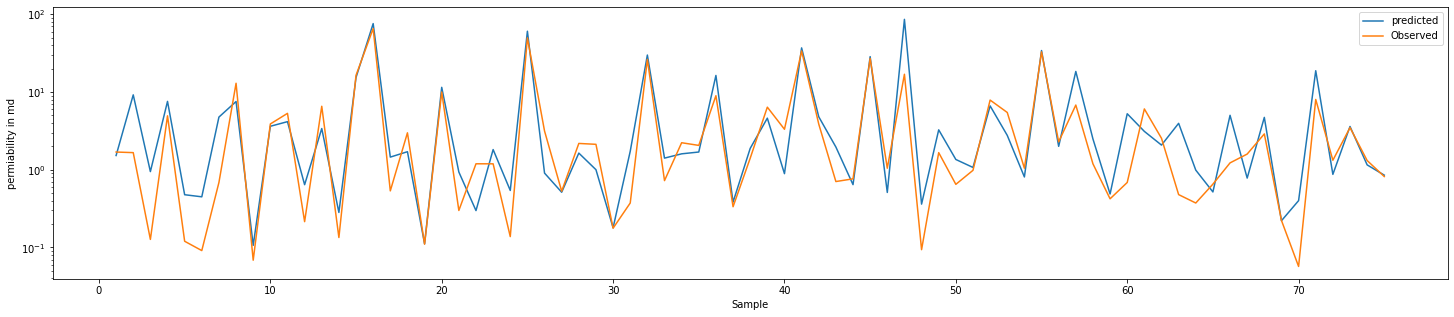

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(z[0],y_pred_2)
plt.plot(z[0],y_test)
plt.yscale('log')
plt.ylabel('permiability in md')
plt.xlabel('Sample')
plt.legend(['predicted','Observed'])

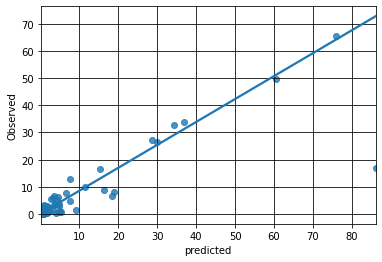

In [ ]:
sns.regplot(y_pred_2,y_test,ci=None,robust=True)
plt.grid(True,color='black')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('predicted')
plt.ylabel('Observed')
plt.show()

**Model Evaluation:**
- RMSE
- R2 score

In [ ]:
E_RF=np.sqrt(metrics.mean_squared_error(y_pred_2,y_test))
np.sqrt(metrics.mean_squared_error(y_pred_2,y_test))

8.614530505059

In [ ]:
R_RF=metrics.r2_score(y_test,y_pred_2)
metrics.r2_score(y_test,y_pred_2)

0.4106314530162901

#**SVM Method**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import   MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor_3=SVR(kernel='rbf',) # RBF has taken as karnel function
regressor_3.fit(x_train,y_train)
y_pred_3=regressor_3.predict(x_test)

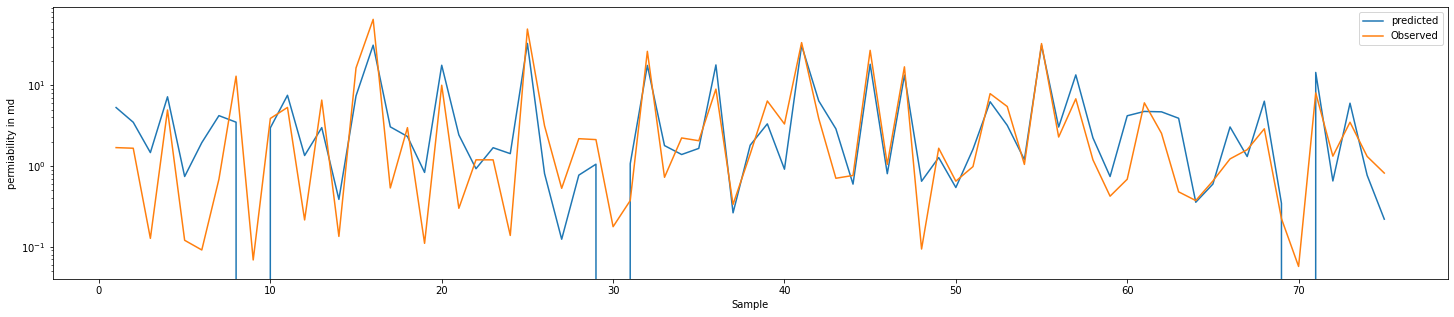

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(z[0],y_pred_3)
plt.plot(z[0],y_test)
plt.yscale('log')
plt.ylabel('permiability in md')
plt.xlabel('Sample')
plt.legend(['predicted','Observed'])

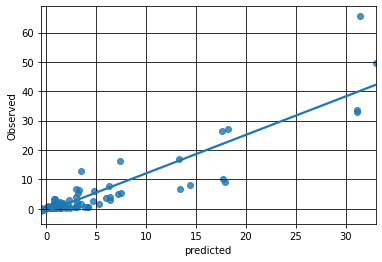

In [ ]:
sns.regplot(y_pred_3,y_test,ci=None)
plt.grid(True,color='black')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('predicted')
plt.ylabel('Observed')
plt.show()

**Model evaluation:**

In [ ]:
E_SVM=np.sqrt(metrics.mean_squared_error(y_pred_3,y_test))
np.sqrt(metrics.mean_squared_error(y_pred_3,y_test)) ## RMSE calculate

5.408047812715318

In [ ]:
R_SVM=metrics.r2_score(y_test,y_pred_3)
metrics.r2_score(y_test,y_pred_3)    #R2 score calculation

0.7677237672483269

#**KNeighbors Regression**

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
## Finding K value for minimum RMSE value 
error=[]
for i in range(1,20):
  knr=KNeighborsRegressor(i)
  knr.fit(x_train,y_train)
  pr=knr.predict(x_test)
  rmse=np.sqrt(metrics.mean_squared_error(y_test,pr))
  error.append(rmse)


(0.0, 20.0)

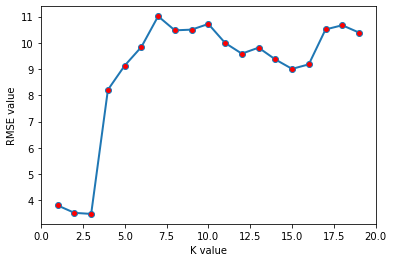

In [ ]:
plt.plot(range(1,20),error,linewidth=2,marker='o',markerfacecolor='r')
plt.xlabel('K value')
plt.ylabel('RMSE value')
plt.xlim(0,20)

In [ ]:
KNR=KNeighborsRegressor(3)   ## for k=3 RMSE is minimum, we can see from above plot
KNR.fit(x_train,y_train)
pred_5=KNR.predict(x_test)
pred=KNR.predict(x_train)

In [ ]:
mse=np.sqrt(metrics.mean_squared_error(y_train,pred ))
r2=metrics.r2_score(y_train,pred)
print(mse,r2)

22.918285615221034 0.9443164107082138


In [ ]:
E_KNN=np.sqrt(metrics.mean_squared_error(y_test,pred_5 ))
R_KNN=metrics.r2_score(y_test,pred_5)
print(E_KNN,R_KNN)

3.4856778628001197 0.9035064631772523


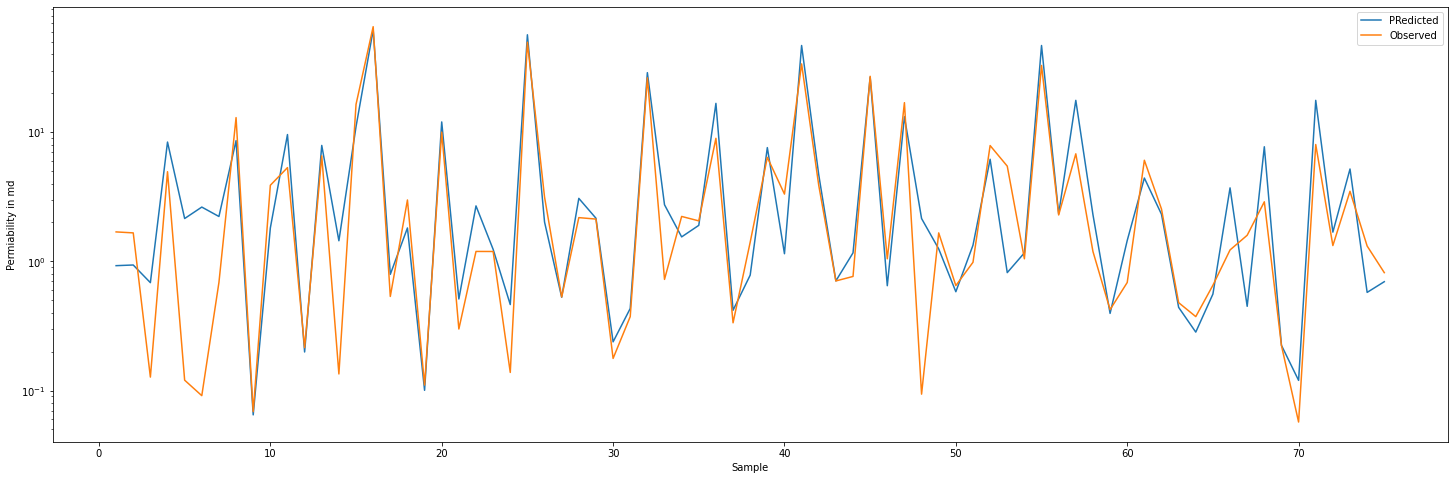

In [ ]:
plt.figure(figsize=(25,8))
z=np.array([range(1,76,1)])
plt.plot(z[0],pred_5)
plt.plot(z[0],y_test)
plt.yscale('log')
plt.xlabel('Sample')
plt.ylabel('Permiability in md')
plt.legend(['PRedicted','Observed'])

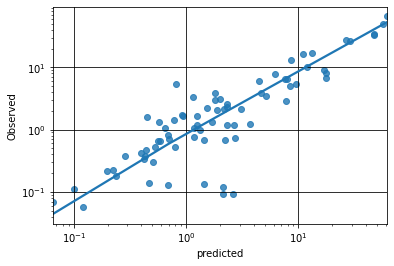

In [ ]:
sns.regplot(pred_5,y_test,ci=None)
plt.grid(True,color='black',)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('predicted')
plt.ylabel('Observed')
plt.show()

#Best Model visualization

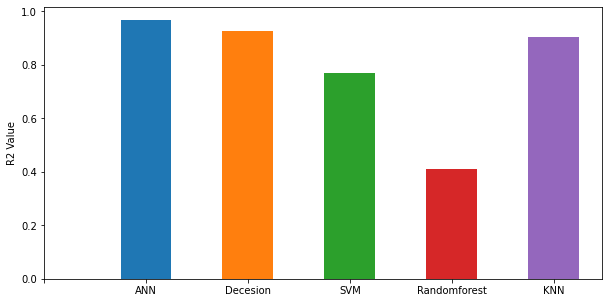

In [ ]:
figure=plt.figure(figsize=(10,5))
width=0.5
bars = ('','ANN', 'Decesion', 'SVM', 'Randomforest','KNN')
y_pos = np.arange(len(bars))
plt.bar(1,R_ANN,width)
plt.bar(2,R_DST,width)
plt.bar(3,R_SVM,width)
plt.bar(4,R_RF,width)
plt.bar(5,R_KNN,width)
plt.ylabel('R2 Value')
plt.xticks(y_pos, bars)
plt.show()

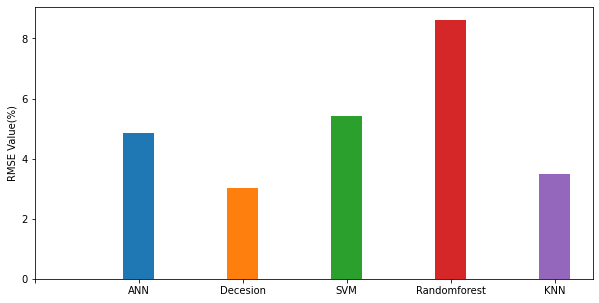

In [ ]:
figure=plt.figure(figsize=(10,5))
width=0.3
bars = ('','ANN', 'Decesion', 'SVM','Randomforest','KNN')
y_pos = np.arange(len(bars))
plt.bar(1,E_ANN,width)
plt.bar(2,E_DST,width)
plt.bar(3,E_SVM,width)
plt.bar(4,E_RF,width)
plt.bar(5,E_KNN,width)
plt.ylabel('RMSE Value(%)')
plt.xticks(y_pos, bars)
plt.show()